# 回归
回归是研究一组随机变量(Y1 ，Y2 ，…，Yi)和另一组(X1，X2，…，Xk)变量之间**关系**的统计分析方法，又称多重回归分析。

通常Y1，Y2，…，Yi是因变量，X1、X2，…，Xk是自变量。

在大量的观察下，变量之间会表现出一定的规律性，可以借助函数关系式来表达，这种函数就称为**回归函数**或**回归方程**。
## 核心思想
逼近、拟合，大量数据进行统计分析，从而获得回归方程

## 基本步骤
1. 确定回归模型属于那种基本类型，然后通过计算得到回归方程的表达式
    1. 根据试验数据画出散点图（1.1）
    2. 确定经验公式的函数类型（1.1）
    3. 通过最小二乘法得到拟合的测试数据（1.2，1.3）
    4. 根据拟合数据绘制拟合曲线，并得到回归方程的表达式（1.4，1.5）
2. 对回归模型进行显著性检验。
    1. 平均绝对误差(MAE）
    2. 均方误差（MSE）
    3. 均方根误差（RMSE）
    3. 平均绝对百分比误差（MAPE）
    4. $R^2$评价指标
    5. F检验法

（如果检验结果表示此模型的显著性很差，应当另选回归模型）

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *

## 简单线性回归

### 1.1.画散点图
根据散点图，确定接下来所用公式的函数类型（线性）

Text(0.5, 1.0, 'Scatterplot of sample data')

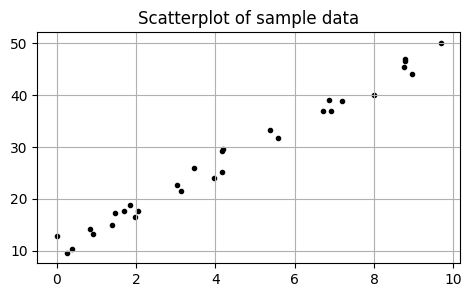

In [3]:
# Generate random data xtrain and ytrain
randseed = np.random.RandomState(1)  
f = lambda t: 8 + 4 * t + randseed.rand(30)*5
xtrain = 10 * randseed.rand(30)
ytrain = f(xtrain)

# Generate a scatterplot with xtrain, ytrain
fig = plt.figure(figsize =(12,3))
fig.add_subplot(1,2,1)
plt.scatter(xtrain,ytrain,marker = '.',color = 'k')
plt.grid(True)
plt.title('Scatterplot of sample data')


### 1.2.训练模型
用普通最小二乘法，使用sklearn库的线性回归方法LinearRegression

In [4]:
# Linear regression evaluator, fitting data to get a fitted straight line
model = linear_model.LinearRegression()
# Fitting the straight line: (x,y)
# x[:,np.newaxis]: Turn the array into (n,1) shape
model.fit(xtrain[:,np.newaxis],ytrain)


LinearRegression()

### 1.3.生成测试数据集
根据测试数据x，预测数据y

In [5]:
# Create test data xtest, and predict ytest according to the fitting curve
xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])


### 1.4.绘制拟合直线和误差线

Text(0.5, 1.0, 'Linear regression fit')

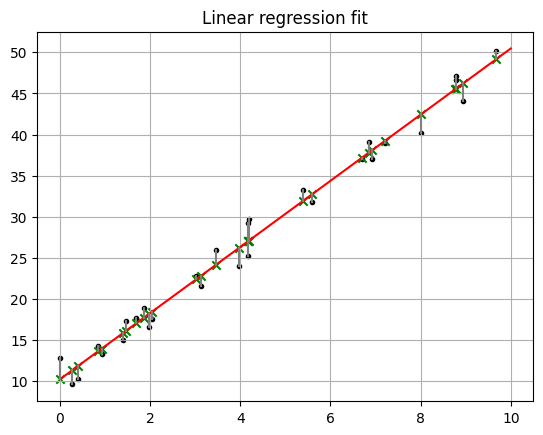

In [6]:
# Draw scatter plots, linear regression fitted straight line
fig.add_subplot(1,2,2)
# Scatterplot of sample data
plt.scatter(xtrain,ytrain,marker = '.',color = 'k')
# the fitted straight line
plt.plot(xtest,ytest,color = 'r')
# ytest2: The y value of the sample data xtrain on the fitted straight line
ytest2 = model.predict(xtrain[:,np.newaxis])
# Scatterplot of ytest2
plt.scatter(xtrain,ytest2,marker = 'x',color = 'g')
# error lines
plt.plot([xtrain,xtrain],[ytrain,ytest2],color = 'gray')
plt.grid()
plt.title('Linear regression fit')


### 1.5.打印直线参数和直线方程
回归方程参数及表达式

In [7]:
print('slope: %.4f' % model.coef_[0])
print('intercept: %.4f' % model.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(model.coef_[0],model.intercept_))


slope: 4.0224
intercept: 10.2383
The linear regression function: y = 4.0224x + 10.2383


### 2.评估简单线性回归模型
直接调用sklearn库的评价方法$R^2$，数值越接近1越好

其余方法后面介绍

In [8]:
r2 = model.score(xtrain[:,np.newaxis],ytrain)
print("R-square: %.5f" % r2)

R-square: 0.98533


## 多元线性回归
简化步骤，具体步骤与简单线性回归一致

### 生成可用的数据
多元，设自变量'b1','b2','b3','b4'，因变量'y'，制表画图：

           b1        b2        b3        b4          y
0    2.219932  8.707323  2.067192  9.186109  60.034105
1    4.884112  6.117439  7.659079  5.184180  24.477270
2    2.968005  1.877212  0.807413  7.384403  47.129990
3    4.413092  1.583099  8.799370  2.740865   2.810948
4    4.142350  2.960799  6.287879  5.798378  24.378742
..        ...       ...       ...       ...        ...
145  9.304389  1.852072  9.603849  7.840690  22.767400
146  9.226937  6.260066  3.517796  6.991209  53.262981
147  4.604858  7.346345  9.537510  0.567426   5.152217
148  1.655563  4.303582  0.274485  3.596028  40.780653
149  4.231780  1.745287  0.419882  6.350959  47.211592

[150 rows x 5 columns]


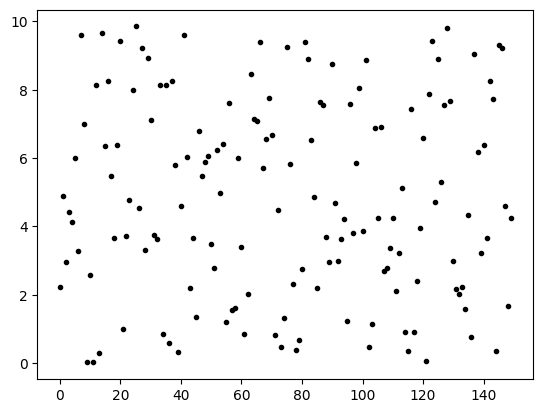

In [24]:
# Generate four sets of data
randseed = np.random.RandomState(5)  
xtrain = 10 * randseed.rand(150,4) 
ytrain = 20 + np.dot(xtrain ,[1.5,2,-4,3])
df = pd.DataFrame(xtrain, columns = ['b1','b2','b3','b4']) # Convert to tabular form
df['y'] = ytrain

pd.plotting.scatter_matrix(df[['b1','b2','b3','b4']],diagonal='kde')
print(df[['b1','b2','b3','b4','y']])

# fig.add_subplot(1,2,2)
# # Scatterplot of sample data
# plt.scatter(np.arange(0,150,1),df[['b1']],marker = '.',color = 'k')
# plt.show()

### 多元回归拟合

In [10]:
model = linear_model.LinearRegression()
model.fit(df[['b1','b2','b3','b4']],df['y'])

print('slope: ' ,model.coef_)
print('intercept: %.4f' % model.intercept_)
print('linear regression function: y = %.1fx1 + %.1fx2 + %.1fx3 + %.1fx4 + %.1f' 
      % (model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.intercept_))


slope:  [ 1.5  2.  -4.   3. ]
intercept: 20.0000
linear regression function: y = 1.5x1 + 2.0x2 + -4.0x3 + 3.0x4 + 20.0


## 模型评估方法

### 平均绝对误差(MAE）
MAE用来衡量预测值与真实值之间的平均绝对误差，MAE越小表示模型越好，其定义如下：

${MAE}=\frac{1}{n}\sum_{i=1}^{n}|y_{i}-{y}^{\prime}_{i}|,\ \in\left[0,+\infty\right)\ \left(1\right)$

In [11]:
def MAE(y, y_pre):
    return np.mean(np.abs(y - y_pre))

### 均方误差（MSE）
MSE也是回归中最普通的评价指标，MSE越小表示模型越好，其定义如下：

$MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-{y}^{\prime}_{i})^{2},~\in[0,+\infty)~~(2)$

In [12]:
def MSE(y, y_pre):
    return np.mean((y - y_pre) ** 2)

### 均方根误差（RMSE）
RMSE是在MSE的基础之上开根号而来，也是量化回归模型整体误差的标准方法

RMSE越小表示模型越好，其定义如下：

$R M S E=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-{y}^{\prime}_{i})^{2}},\ \in\,[0,+\infty)\ \ \ (3)$

In [13]:
def RMSE(y, y_pre):
    return np.sqrt(MSE(y, y_pre))

### 平均绝对百分比误差（MAPE）
MAPE和MAE类似，只是在MAE的基础上做了标准化处理，MAPE越小表示模型越好，其定义如下：

$M A P E=\frac{100\%}{n}\sum_{i=1}^{n}\left|\frac{y_{i}-{y}^{\prime}_{i}}{y_{i}}\right|,\;\;\in\left[0,+\infty\right)\;\;(4)$

In [14]:
def MAPE(y, y_pre):
    return np.mean(np.abs((y - y_pre) / y))

### $R^2$评价指标
sklearn在实现线性回归时默认采用了该指标，越接近1表示模型越好，其定义如下：

$R^{2}\,=\,1\,-\,\frac{\sum_{i=1}^{n}(y_{i}-{y}^{\prime}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\overline{{y}})^{2}}\,\in\,[0,1]\;\;\;\;(5)$

其中 $\overline{{y}}$ 表示真实值的平均值。$R^2$的好处在于其结果进行了归一化，更容易看出模型间的差距。

In [15]:
def R2(y, y_pre):
    u = np.sum((y - y_pre) ** 2)
    v = np.sum((y - np.mean(y)) ** 2)
    return 1 - (u / v)

## 评估之前多元线性回归的模型

In [16]:
y_pre = model.predict(df[['b1','b2','b3','b4']]) # ytest, predicted data
y = df['y'] # ytrain, Raw data

print("MAE:", MAE(y, y_pre))
print("MSE:", MSE(y, y_pre))
print("RMSE:", RMSE(y, y_pre))
print("MAPE:", MAPE(y, y_pre))
print("R2:", R2(y, y_pre), model.score(df[['b1','b2','b3','b4']],y))

MAE: 1.1866063687193673e-14
MSE: 2.1141472259923116e-28
RMSE: 1.4540107379219425e-14
MAPE: 4.67988884430622e-16
R2: 1.0 1.0


## 非线性回归
以基于多项式的回归模型为主，即用曲线方程代替直线方程拟合坐标图上各点，使得各点到曲线的距离总和最短。

### 思路
对数据标准化(略) -> 构造多项式特征(PolynomialFeatures) -> 线性回归(LinearRegression)

In [17]:
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [18]:
data = [(1000,168),(792,184),(1260,197),(1262,220),(1240,228),(1170,248),(1230,305),(1255,256),(1194,240),(1450,230),(1481,202),(1475,220),(1482,232),(1484,460),(1512,320),(1680,340),(1620,240),(1720,368),(1800,280),(4400,710),(4212,552),(3920,580),(3212,585),(3151,590),(3100,560),(2700,285),(2612,292),(2705,482),(2570,462),(2442,352),(2387,440),(2292,462),(2308,325),(2252,298),(2202,352),(2157,403),(2140,308),(4000,795),(4200,765),(3900,705),(3544,420),(2980,402),(4355,762),(3150,392)]
xtrain, ytrain = [], []
for i in range(len(data)):
    xtrain.append(data[i][0])
    ytrain.append(data[i][1])
xtrain = np.array(xtrain).reshape([len(xtrain), 1])
ytrain = np.array(ytrain)
xtest = np.arange(min(xtrain) , max(xtrain)).reshape([-1, 1])

### 构造多项式特征

In [19]:
# degree=2 means quadratic polynomial
poly_reg_x =PolynomialFeatures(degree=2)
# Construct xtrain quadratic polynomial feature xtrain_poly
xtrain_poly=poly_reg_x.fit_transform(xtrain)
xtest_poly = poly_reg_x.fit_transform(xtest)

### 使用线性回归的方法解决

In [20]:
# Create a linear regression model
model = linear_model.LinearRegression()
model.fit(xtrain_poly,ytrain) # model fitting
# predict
ytest = model.predict(xtest_poly)


Coefficients: [0.00000000e+00 4.93982848e-02 1.89186822e-05]
intercept: 151.84696750500436


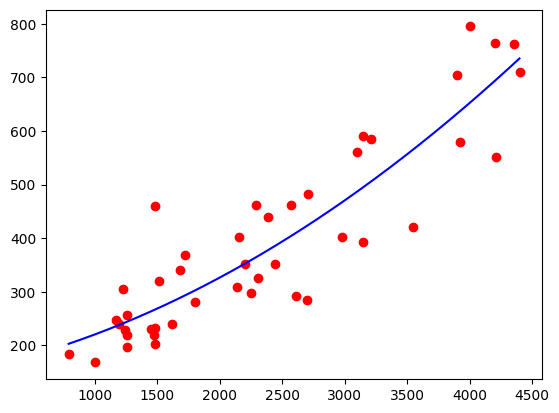

In [21]:
# View regression coefficients
print('Coefficients:',model.coef_)
# view intercept
print('intercept:',model.intercept_)  

# Draw scatter plots、
plt.scatter(xtrain, ytrain, color='red')   
plt.plot(xtest, ytest, color='blue')    
plt.show()

In [26]:
print(ytest, len(ytest))
print(ytrain, len(ytrain))
y_pre = np.array(ytest)
y = np.array(ytrain)

print(model.score(xtest_poly,ytest))
MSE(y,y_pre)

[202.83741733 202.91680172 202.99622396 ... 734.8176301  735.0334182
 735.24924413] 3608
[60.03410471 24.47727047 47.12999023  2.81094831 24.37874189 30.53553125
 50.09014665 43.33609777 62.50050797 34.31100987 32.79956659  2.13257524
 26.84888589 25.24638808 31.42510222 36.07988921 20.87954966 47.73254959
  9.12733301 44.29045708 13.02559568 37.59949098 -5.23487553 36.98340247
 21.8517364  54.36093169 38.3626941  63.5443741  25.36519927 44.67358183
 43.21902148 24.32567184 52.74874154 42.20951629 36.48194137 52.29241583
 26.43379206  9.33856136 19.3352812  43.53318911 25.76240928 36.66477906
 43.60184532 24.39562241 21.31211252 32.12498022 19.15298236 30.48071512
 50.05762866 27.56640472 20.6582189  30.74048034 18.73216752 25.00656565
 24.0165886  26.47501464  7.55610027 55.81297448 36.99336895 47.94842214
 51.87384801 12.25713933 31.53948824 45.51868286 52.1072107  58.12696048
 40.31212367 51.47778749 37.58219282 36.08112992 39.1228255  10.88028904
 18.35622969 34.32821465  5.7722511

ValueError: operands could not be broadcast together with shapes (150,) (3608,) 